In [24]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import SelectFromModel

<h2> Data Exploration </h2>

In [4]:
df = pd.read_csv('data.csv')

In [5]:
#understand columns and have a first look at the data
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
#count of benign and malignant values in dataset
df.groupby('diagnosis')['id'].count()

diagnosis
B    357
M    212
Name: id, dtype: int64

In [7]:
#which columns have NaN values and how many
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [8]:
del df['Unnamed: 32']

In [9]:
df.isin([0]).any(axis=0)

id                         False
diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean              True
concave points_mean         True
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se                True
concave points_se           True
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst             True
concave points_worst        True
symmetry_w

<h2> Encoding Diagnosis Column </h2>

In [10]:
#Encoding categorical data values (M=1 and B=0)
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
df['diagnosis'] = labelencoder_Y.fit_transform(df['diagnosis'])
print(df['diagnosis'].head())

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64


<h2> Splitting Training Data </h2>

In [64]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
y = df['diagnosis']
x = df[['concavity_mean', 'fractal_dimension_se', 'texture_worst', 'perimeter_worst', 'concavity_worst']]
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state = 0, stratify=y)

<h2> Feature Scaling </h2>

In [65]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

<h2> Training Various Models </h2>

In [66]:
#Using Logistic Regression Algorithm to the Training Set
from sklearn.linear_model import LogisticRegression
classifier_LR = LogisticRegression(random_state = 0)
classifier_LR.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [67]:
#Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
from sklearn.neighbors import KNeighborsClassifier
classifier_KN = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier_KN.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [122]:
#Using SVC method of svm class to use Support Vector Machine Algorithm
from sklearn.svm import SVC
classifier_LSVM = SVC(kernel = 'linear', random_state = 0, probability = True)
classifier_LSVM.fit(X_train, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [123]:
#Using SVC method of svm class to use Kernel SVM Algorithm
from sklearn.svm import SVC
classifier_SVC = SVC(kernel = 'rbf', random_state = 0)
classifier_SVC.fit(X_train, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [124]:
#Using GaussianNB method of naïve_bayes class to use Naïve Bayes Algorithm
from sklearn.naive_bayes import GaussianNB
classifier_NB = GaussianNB()
classifier_NB.fit(X_train, Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [125]:
#Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm
from sklearn.tree import DecisionTreeClassifier
classifier_DT = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier_DT.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [126]:
#Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
from sklearn.ensemble import RandomForestClassifier
classifier_RF = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier_RF.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

<h2> Calculating Results of various models </h2>

In [127]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Logistic Regression
Y_pred = classifier_RF.predict(X_test)
LR_CR = classification_report(Y_test, Y_pred)
LR = accuracy_score(Y_test, Y_pred)
cmLR = confusion_matrix(Y_test, Y_pred)
print(cmLR)

[[69  3]
 [ 3 39]]


In [128]:
# KNeighborsClassifier
Y_pred = classifier_KN.predict(X_test)
KN_CR = classification_report(Y_test, Y_pred)
KN = accuracy_score(Y_test, Y_pred)
cmKN = confusion_matrix(Y_test, Y_pred)
print(cmKN)

[[67  5]
 [ 1 41]]


In [129]:
# SVC method of SVM class (Linear SVM)
Y_pred = classifier_LSVM.predict(X_test)
LSVM_CR = classification_report(Y_test, Y_pred)
LSVM = accuracy_score(Y_test, Y_pred)
cmLSVM = confusion_matrix(Y_test, Y_pred)
print(cmLSVM)

[[71  1]
 [ 1 41]]


In [130]:
# SVC method of SVM class (Kernel SVM)
Y_pred = classifier_SVC.predict(X_test)
SVC_CR = classification_report(Y_test, Y_pred)
SVC = accuracy_score(Y_test, Y_pred)
cmSVC = confusion_matrix(Y_test, Y_pred)
print(cmSVC)

[[69  3]
 [ 1 41]]


In [131]:
# GaussianNB
Y_pred = classifier_NB.predict(X_test)
NB_CR = classification_report(Y_test, Y_pred)
NB = accuracy_score(Y_test, Y_pred)
cmNB = confusion_matrix(Y_test, Y_pred)
print(cmNB)

[[67  5]
 [ 4 38]]


In [132]:
# DecisionTreeClassifier
Y_pred = classifier_DT.predict(X_test)
DT_CR = classification_report(Y_test, Y_pred)
DT = accuracy_score(Y_test, Y_pred)
cmdT = confusion_matrix(Y_test, Y_pred)
print(cmdT)

[[68  4]
 [ 5 37]]


In [133]:
# RandomForestClassifier
Y_pred = classifier_RF.predict(X_test)
RFCR = classification_report(Y_test, Y_pred)
RF = accuracy_score(Y_test, Y_pred)
cmRF = confusion_matrix(Y_test, Y_pred)
print(cmRF)

[[69  3]
 [ 3 39]]


<h2> Model Metrics </h2>

In [142]:
accuracies = {'Model Name':['Logistic Regression', 'KNeighborsClassifier', 'Linear SVM', 
                            'Kernel SVM (SVC)', 'GaussianNB', 'DecisionTreeClassifier', 
                           'RandomForestClassifier'], 'Model Accuracy':[LR, KN, LSVM, SVC, NB, DT, RF]}

df_model_accuracies = pd.DataFrame(accuracies)
df_model_accuracies.sort_values('Model Accuracy', ascending=False)

,Model Name,Model Accuracy
2,Linear SVM,0.982456
3,Kernel SVM (SVC),0.964912
0,Logistic Regression,0.947368
1,KNeighborsClassifier,0.947368
6,RandomForestClassifier,0.947368
4,GaussianNB,0.921053
5,DecisionTreeClassifier,0.921053


<h2> Lineear SVM Metrics </h2>

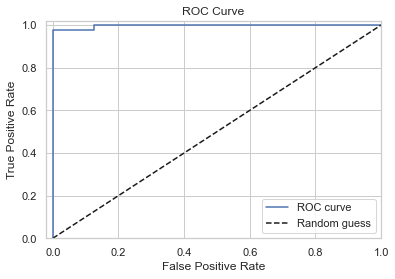

In [137]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
%matplotlib inline

Y_pred_prob = classifier_LSVM.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_prob)
# create plot
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')
_ = plt.xlim([-0.02, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower right")

In [138]:
#ROC_AUC_SCORE
from sklearn.metrics import roc_auc_score

roc_auc_score(Y_test, Y_pred_prob)

0.9970238095238095

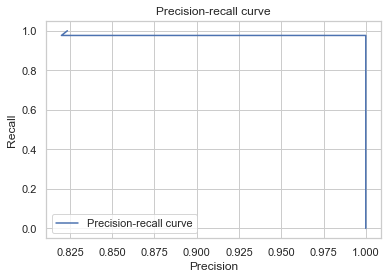

In [139]:
#precision-recall curve
from sklearn.metrics import precision_recall_curve 

precision, recall, thresholds = precision_recall_curve(Y_test, Y_pred_prob)
# create plot
plt.plot(precision, recall, label='Precision-recall curve')
_ = plt.xlabel('Precision')
_ = plt.ylabel('Recall')
_ = plt.title('Precision-recall curve')
_ = plt.legend(loc="lower left")

In [141]:
#Avg precision score
from sklearn.metrics import average_precision_score
average_precision_score(Y_test, Y_pred_prob)

0.9957983193277312